In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

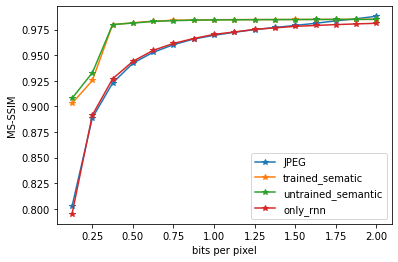

In [5]:
## ms-ssim

x = np.arange(1, 17) / 192 * 24
y_all = []

path = '/content/jpeg_ms-ssim.csv'
df = pd.read_csv(path)
y_all.append([df.iloc[:,i].mean() for i in range(16)])

path = '/content/semantic_trained__min_iter_all_k.xlsx'
df = pd.read_excel(path)
y_all.append([df["msssim_{}".format(i)].mean() for i in range(1,17)])

path = '/content/semantic_untrained_min_iter_all_k.xlsx'
df = pd.read_excel(path)
y_all.append([df["msssim_{}".format(i)].mean() for i in range(1,17)])

path = '/content/test_only_rnn.xlsx'
df = pd.read_excel(path)
y_all.append([df["msssim_{}".format(i)].mean() for i in range(1,17)])



labels = [ 'JPEG','trained_sematic', 'untrained_semantic', 'only_rnn']
for i,y in  enumerate(y_all):
  plt.plot(x, y, '-*', label=labels[i])

plt.xlabel('bits per pixel')
plt.ylabel('MS-SSIM')
plt.legend()
plt.show()


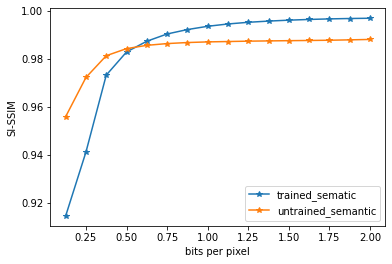

In [ ]:
# si-ssim

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 17) / 192 * 24
y_all = []

path = '/content/jpeg_si-ssim.xlsx'
df = pd.read_excel(path)
y_all.append(df["sissim"])

path = '/content/semantic_trained__min_iter_all_k.xlsx'
df = pd.read_excel(path)
y_all.append([df["sissim_{}".format(i)].mean() for i in range(1,17)])

path = '/content/semantic_untrained_min_iter_all_k.xlsx'
df = pd.read_excel(path)
y_all.append([df["sissim_{}".format(i)].mean() for i in range(1,17)])

path = '/content/test_only_rnn.xlsx'
df = pd.read_excel(path)
y_all.append([df["sissim_{}".format(i)].mean() for i in range(1,17)])

labels = [ 'JPEG','trained_sematic', 'untrained_semantic', 'only_rnn']
for i,y in  enumerate(y_all):
  plt.plot(x, y, '-*', label=labels[i])

plt.xlabel('bits per pixel')
plt.ylabel('SI-SSIM')
plt.legend()
plt.show()


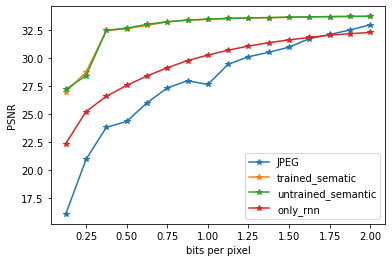

In [16]:
## psnr

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 17) / 192 * 24
y_all = []

path = '/content/jpeg_psnr.xlsx'
df = pd.read_excel(path)
y_all.append(df["psnr"])

path = '/content/semantic_trained__min_iter_all_k.xlsx'
df = pd.read_excel(path)
y_all.append([df["psnr_{}".format(i)].mean() for i in range(1,17)])

path = '/content/semantic_untrained_min_iter_all_k.xlsx'
df = pd.read_excel(path)
y_all.append([df["psnr_{}".format(i)].mean() for i in range(1,17)])

path = '/content/test_only_rnn.xlsx'
df = pd.read_excel(path)
y_all.append([df["psnr_{}".format(i)].mean() for i in range(1,17)])

labels = [ 'JPEG','trained_sematic', 'untrained_semantic', 'only_rnn']
for i,y in  enumerate(y_all):
  plt.plot(x, y, '-*', label=labels[i])

plt.xlabel('bits per pixel')
plt.ylabel('PSNR')
plt.legend()
plt.show()

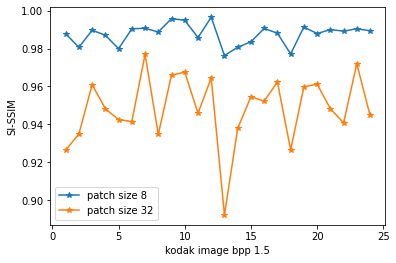

In [ ]:
### patch 32 vs patch 8 untrained bpp 1.5 si-ssim

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 25)
y_all = []

path = '/content/untrained_semantic.xlsx'
df = pd.read_excel(path)
y_all.append(list(df["sissim_12"][:-1]))  # without the avg

path = '/content/patch32_k12.xlsx'
df = pd.read_excel(path)
y_all.append(list(df["sissim_12"][:-1]))

labels = ['patch size 8', 'patch size 32']
for i,y in  enumerate(y_all):
  plt.plot(x, y, '-*', label=labels[i])

plt.xlabel('kodak image bpp 1.5')
plt.ylabel('SI-SSIM')
plt.legend()
plt.show()

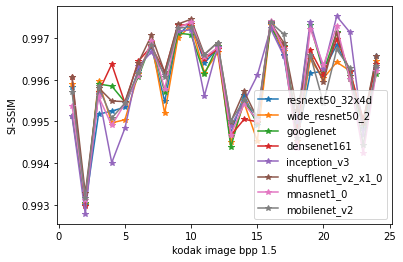

In [ ]:
# all networks bpp 1.5 si-ssim
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

networks = ['resnext50_32x4d', 'wide_resnet50_2', 'googlenet', 'densenet161', 'inception_v3',
                       'shufflenet_v2_x1_0', 'mnasnet1_0', 'mobilenet_v2']
x = np.arange(1, 25)

path = '/content/sematic_all_networks.xlsx'
df = pd.read_excel(path)

for network in networks:
  y = df["sissim_{}".format(network)][:-1]  # without the avg
  plt.plot(x, y, '-*', label=network)

plt.xlabel('kodak image bpp 1.5')
plt.ylabel('SI-SSIM')
plt.legend()
plt.show()

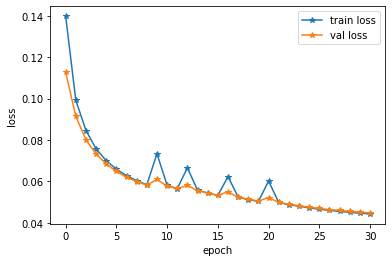

In [ ]:
# training RNN


path = '/content/epoch_31_train_rnn.xlsx'
df = pd.read_excel(path)

x = df.index

plt.plot(x, df["train_loss"], '-*', label="train loss")
plt.plot(x, df["val_loss"], '-*', label="val loss")

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
## calc psnr

import pandas as pd
import os
import numpy as np
from PIL import Image


def psnr(original, compared):
    if isinstance(original, str):
        original = np.array(Image.open(original).convert('RGB'), dtype=np.float32)
    if isinstance(compared, str):
        compared = np.array(Image.open(compared).convert('RGB'), dtype=np.float32)
    # print(original.shape, compared.shape)
    mse = np.mean(np.square(original - compared))
    psnr = np.clip(
        np.multiply(np.log10(255. * 255. / mse[mse > 0.]), 10.), 0., 99.99)[0]
    return psnr

dir1 = '/content/kodak'
images1 = sorted(os.listdir(dir1))[1:]
psnr_all = []
for i in range(1,17):
  print("====={}================".format(i))
  dir2 = '/content/k{}'.format(i)
  
  images2 = sorted(os.listdir(dir2)) #[1:]
  if images2[0] == '.ipynb_checkpoints':
    images2 = images2[1:]
  print(images2)
  psnr_res = []
  for orig, new in zip(images1, images2):
    psnr_res.append(psnr(os.path.join('/content/kodak',orig), os.path.join('/content/k{}'.format(i),new)))
  psnr_all.append(psnr_res)

df = pd.DataFrame()
for k in range(16):
  name_col = "psnr_{}".format(k+1)
  df[name_col] = psnr_all[k] + [sum(psnr_all[k]) / len(psnr_all[k])]
print(df)
output_name = 'psnr_rnn_only'
df.to_excel(output_name +'.xlsx')

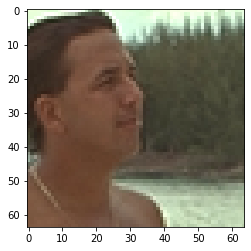

In [ ]:
## calc ssim for specific patch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# find the specific patch. 
# imshow it and the original

path = '/content/kodim12.png'
transt = transforms.ToTensor()
image = transt(Image.open(path).convert("RGB"))
image = image.squeeze()
# print(image.shape) [3, 512, 768] -> 64, 96
tiles = image.data.unfold(0, 3, 3).unfold(1, 64, 64).unfold(2, 64, 64).squeeze()

i, j = 1, 5
patch = tiles[i][j]
image = np.squeeze(patch.numpy().clip(0, 1) * 255.0)
image = image.astype(np.uint8).transpose(1, 2, 0)
image = Image.fromarray(image)
plt.imshow(image)


# guy's face: 1,5